In [1]:
import numpy as np
from bs4 import BeautifulSoup
import requests
from requests import get
import pandas as pd
import numpy as np
import os
import time
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import prepare

print('Success')

Success


In [2]:
gitMDs = prepare.prep_gitMDs()
gitMDs

,body,top_code,clean,top_code_clean,percentage
0,\n\n\n\n\nfreeCodeCamp.org's open-source codeb...,\n\nJavaScript\n91.3%\n,freecodecamporg ' opensource codebase curricul...,javascript,91.3
1,\n\n\n\n\n\n\n\n\n\n\nSupporting Vue.js\nVue.j...,\n\nJavaScript\n97.7%\n,supporting vuejs vuejs mitlicensed open source...,javascript,97.7
2,React · \nReact is a JavaScript library for...,\n\nJavaScript\n95.0%\n,react react javascript library building user i...,javascript,95.0
3,"\n\n\n\n\nBootstrap\n\n Sleek, intuitive, and...",\n\nJavaScript\n46.7%\n,bootstrap sleek intuitive powerful frontend fr...,javascript,46.7
4,Airbnb JavaScript Style Guide() {\nA mostly re...,\n\nJavaScript\n100.0%\n,airbnb javascript style guide mostly reasonabl...,javascript,100.0
...,...,...,...,...,...
224,\n\n\n\n An Apache 2.0 NLP research library...,\n\nPython\n97.6%\n,apache 20 nlp research library built pytorch d...,python,97.6
225,\n\n\n\n\nAbout\nWifiphisher is a rogue Access...,\n\nPython\n76.3%\n,wifiphisher rogue access point framework condu...,python,76.3
226,httpbin(1): HTTP Request & Response Service\nA...,\n\nPython\n74.6%\n,httpbin1 http request response service kenneth...,python,74.6
227,"一些非常有趣的python爬虫例子,对新手比较友好\n\n\n\n\n\n\n\n\n\n\...",\n\nPython\n88.1%\n,python python gitee 1 chrome chromechromedrive...,python,88.1


In [3]:
gitMDs['top_code_clean'].unique()

array(['javascript', 'python'], dtype=object)

In [4]:
# create series objects for each top_code_clean that is a string of words joined on spaces to make it 1 continious string  
python_words = ' '.join(gitMDs[gitMDs.top_code_clean=='python'].clean)
javascript_words = ' '.join(gitMDs[gitMDs.top_code_clean=='javascript'].clean)
all_words = ' '.join(gitMDs.clean)

python_words

"english portugues brasil deutsch italiano polski espanol turkce tieng viet francais add translation help translate guide system design primer motivation learn design largescale system prep system design interview learn design largescale system learning design scalable system help become better engineer system design broad topic vast amount resource scattered throughout web system design principle repo organized collection resource help learn build system scale learn open source community continually updated open source project contribution welcome prep system design interview addition coding interview system design required component technical interview process many tech company practice common system design interview question compare result sample solution discussion code diagram additional topic interview prep study guide approach system design interview question system design interview question solution objectoriented design interview question solution additional system design inte

Remove any instance of a single character surrounded by spaces

In [5]:
python_words = re.sub(r'\s.\s', '', python_words)
javascript_words = re.sub(r'\s.\s', '', javascript_words)
all_words = re.sub(r'\s.\s', '', all_words)

python_words

"english portugues brasil deutsch italiano polski espanol turkce tieng viet francais add translation help translate guide system design primer motivation learn design largescale system prep system design interview learn design largescale system learning design scalable system help become better engineer system design broad topic vast amount resource scattered throughout web system design principle repo organized collection resource help learn build system scale learn open source community continually updated open source project contribution welcome prep system design interview addition coding interview system design required component technical interview process many tech company practice common system design interview question compare result sample solution discussion code diagram additional topic interview prep study guide approach system design interview question system design interview question solution objectoriented design interview question solution additional system design inte

In [6]:
# For eachttp://localhost:8889/notebooks/Documents/Data_Science/CodeUp/NLP-MVPs/anthony/anthony-explore.ipynb#h topic find out how many times each word happens and put that into a topic_freq obj.
all_freq = pd.Series(all_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
javascript_freq = pd.Series(javascript_words.split()).value_counts()


python_freq.head()

python      843
learning    696
yes         692
data        679
use         580
dtype: int64

In [7]:
# Combine all the series together into a single data frame to see the word count across all topics
word_counts = (pd.concat([all_freq, python_freq, javascript_freq], axis=1, sort=True)
               .set_axis(['all', 'python', 'javascript', ], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,python,javascript
&#9;,757,144,613
&#9;&#9;p,1,1,0
&#9;110,1,0,1
&#9;111,1,0,1
&#9;112,1,0,1


Find the top 10 words across both javascript and python

In [8]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,python,javascript
code,1752,393,1359
use,1345,580,765
source,1320,236,1084
file,1127,452,675
using,1067,460,607
python,1006,843,163
data,983,679,304
react,969,5,964
native,950,23,927
project,894,191,703


Find the top 10 words used in python

In [9]:
word_counts.sort_values(by='python', ascending=False).head(10)

,all,python,javascript
python,1006,843,163
learning,745,696,49
yes,701,692,9
data,983,679,304
use,1345,580,765
library,808,567,241
network,616,560,56
unknown,533,528,5
no,691,525,166
using,1067,460,607


Find the top 10 words used in javascript

In [10]:
word_counts.sort_values(by='javascript', ascending=False).head(10)

,all,python,javascript
code,1752,393,1359
source,1320,236,1084
react,969,5,964
native,950,23,927
use,1345,580,765
function,856,119,737
javascript,771,45,726
project,894,191,703
file,1127,452,675
&#9;,757,144,613


Find the top 10 words in Python where the word appears less than 5 times in javascript 

In [11]:
word_counts[word_counts.javascript<5].sort_values(by='python', ascending=False).head(10)

,all,python,javascript
adversarial,299,299,0
generative,265,265,0
neural,258,255,3
apikey,248,248,0
pip,225,225,0
et,191,191,0
al,182,182,0
youtubedl,140,136,4
paper,121,117,4
tensorflow,105,103,2


Find the top 10 words in javascript where the word appears less than 5 times in  Python

In [21]:
word_counts[word_counts.python<5].sort_values(by='javascript', ascending=False).head(10)

,all,python,javascript
const,609,0,609
takehome,327,0,327
onsite,264,0,264
reactnative,190,2,188
selector,174,2,172
gpl30,166,0,166
agpl30,131,0,131
eslint,113,1,112
slide,106,0,106
san,106,1,105


<Figure size 1440x1008 with 0 Axes>

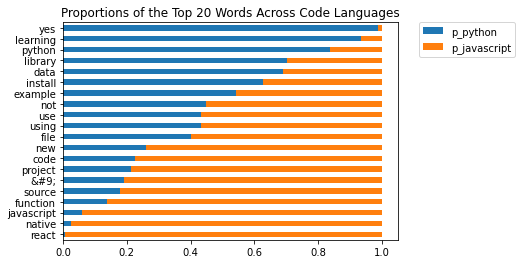

In [13]:
# visualize the percentage each coding language makes up for the top 20 words
plt.figure(figsize=(20,14))
(word_counts.assign(p_python = word_counts.python/word_counts['all'], 
                   p_javascript = word_counts.javascript/word_counts['all'])
 .sort_values(by='all')[['p_python', 'p_javascript']]
 .tail(20)
 .sort_values(by='p_python')
 .plot.barh(stacked=True)
)

plt.title("Proportions of the Top 20 Words Across Code Languages")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.show()

In [72]:
top_10_js_words = word_counts['javascript'].sort_values(ascending=False).head(10)
top_10_py_words = word_counts['python'].sort_values(ascending=False).head(10)

top_10_each = (list(top_10_py_words.index) + list(top_10_js_words.index))

top10 = word_counts[word_counts.index.isin(top_10_each)]
top10

,all,python,javascript
&#9;,757,144,613
code,1752,393,1359
data,983,679,304
file,1127,452,675
function,856,119,737
javascript,771,45,726
learning,745,696,49
library,808,567,241
native,950,23,927
network,616,560,56


<Figure size 1440x1008 with 0 Axes>

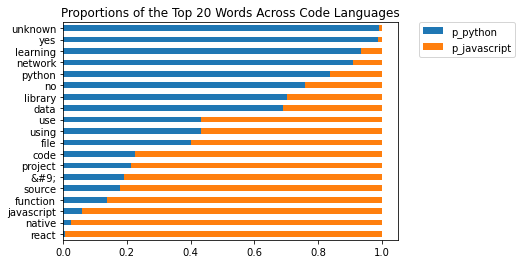

In [73]:
# visualize the percentage each coding language makes up for the top 20 words
plt.figure(figsize=(20,14))
(top10.assign(p_python = top10.python/top10['all'], 
                   p_javascript = top10.javascript/top10['all'])
 .sort_values(by='all')[['p_python', 'p_javascript']]
 .tail(20)
 .sort_values(by='p_python')
 .plot.barh(stacked=True)
)

plt.title("Proportions of the Top 20 Words Across Code Languages")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.show()

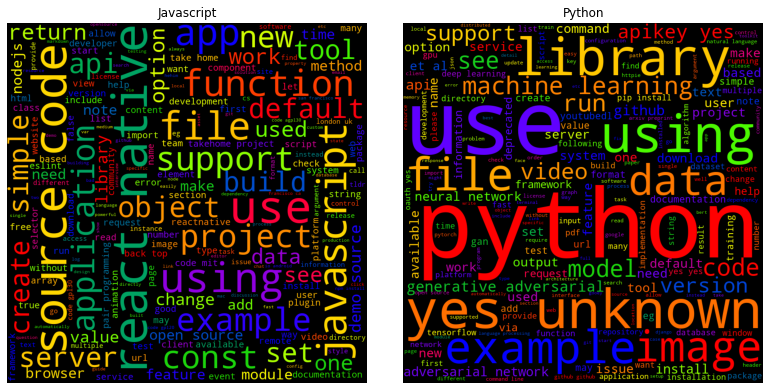

In [31]:
from wordcloud import WordCloud

js_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate(javascript_words)

py_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate(python_words)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(js_cloud)
axs[1].imshow(py_cloud)

axs[0].set_title('Javascript')
axs[1].set_title('Python')

for ax in axs: ax.axis('off')

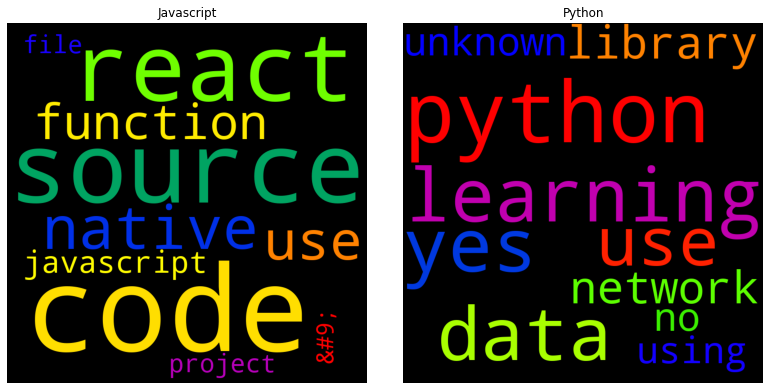

In [40]:
top_10_js_words = word_counts['javascript'].sort_values(ascending=False).head(10)
top_10_py_words = word_counts['python'].sort_values(ascending=False).head(10)


js = {k: v for k, v in top_10_js_words.to_dict().items()}
py = {k: v for k, v in top_10_py_words.to_dict().items()}


js10_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate_from_frequencies(js)

py10_cloud = WordCloud(background_color='black', 
                      height=800, width=800, colormap='prism').generate_from_frequencies(py)

plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(js10_cloud)
axs[1].imshow(py10_cloud)

axs[0].set_title('Javascript')
axs[1].set_title('Python')

for ax in axs: ax.axis('off')